# 数据处理
## 载入数据

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import seaborn as sns
import lightgbm as lgb

In [2]:
train = pd.read_csv('./train/train.csv', na_values = -1)
test = pd.read_csv('./test/test.csv', na_values = -1)

train['target'].value_counts()##数据不均衡

0    573518
1     21694
Name: target, dtype: int64

## 特征分类

In [26]:
values = list(train.columns)[2: ]
cate1 = []
cate2 = []
cate_con_or_ord = []
cat_cols = []
bin_cols = []

for col in train.columns:
    cols = col.split('_')
    if len(cols) == 3:
        cate1.append(cols[1])
        cate2.append('continuous or ordinal')
        cate_con_or_ord.append(col)
    if len(cols) == 4:
        cate1.append(cols[1])
        cate2.append(cols[3])
        if cols[3] == 'cat':
            cat_cols.append(col)
        if cols[3] == 'bin':
            bin_cols.append(col)
columns_df = pd.DataFrame({'category_1': cate1, 'category_2': cate2}, index = values)
columns_df

,category_1,category_2
ps_ind_01,ind,continuous or ordinal
ps_ind_02_cat,ind,cat
ps_ind_03,ind,continuous or ordinal
ps_ind_04_cat,ind,cat
ps_ind_05_cat,ind,cat
ps_ind_06_bin,ind,bin
ps_ind_07_bin,ind,bin
ps_ind_08_bin,ind,bin
ps_ind_09_bin,ind,bin
ps_ind_10_bin,ind,bin


In [4]:
test[cate_con_or_ord].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 26 columns):
ps_ind_01     892816 non-null int64
ps_ind_03     892816 non-null int64
ps_ind_14     892816 non-null int64
ps_ind_15     892816 non-null int64
ps_reg_01     892816 non-null float64
ps_reg_02     892816 non-null float64
ps_reg_03     731132 non-null float64
ps_car_11     892815 non-null float64
ps_car_12     892816 non-null float64
ps_car_13     892816 non-null float64
ps_car_14     829011 non-null float64
ps_car_15     892816 non-null float64
ps_calc_01    892816 non-null float64
ps_calc_02    892816 non-null float64
ps_calc_03    892816 non-null float64
ps_calc_04    892816 non-null int64
ps_calc_05    892816 non-null int64
ps_calc_06    892816 non-null int64
ps_calc_07    892816 non-null int64
ps_calc_08    892816 non-null int64
ps_calc_09    892816 non-null int64
ps_calc_10    892816 non-null int64
ps_calc_11    892816 non-null int64
ps_calc_12    892816 non-null int64
ps_

In [5]:
train[cate_con_or_ord].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 26 columns):
ps_ind_01     595212 non-null int64
ps_ind_03     595212 non-null int64
ps_ind_14     595212 non-null int64
ps_ind_15     595212 non-null int64
ps_reg_01     595212 non-null float64
ps_reg_02     595212 non-null float64
ps_reg_03     487440 non-null float64
ps_car_11     595207 non-null float64
ps_car_12     595211 non-null float64
ps_car_13     595212 non-null float64
ps_car_14     552592 non-null float64
ps_car_15     595212 non-null float64
ps_calc_01    595212 non-null float64
ps_calc_02    595212 non-null float64
ps_calc_03    595212 non-null float64
ps_calc_04    595212 non-null int64
ps_calc_05    595212 non-null int64
ps_calc_06    595212 non-null int64
ps_calc_07    595212 non-null int64
ps_calc_08    595212 non-null int64
ps_calc_09    595212 non-null int64
ps_calc_10    595212 non-null int64
ps_calc_11    595212 non-null int64
ps_calc_12    595212 non-null int64
ps_

## 处理空值数据

('ps_car_03_cat', 411231)
('ps_car_05_cat', 266551)
('ps_reg_03', 107772)
('ps_car_14', 42620)
('ps_car_07_cat', 11489)
('ps_ind_05_cat', 5809)
('ps_car_09_cat', 569)
('ps_ind_02_cat', 216)
('ps_car_01_cat', 107)
('ps_ind_04_cat', 83)
('ps_car_02_cat', 5)
('ps_car_11', 5)
('ps_car_12', 1)


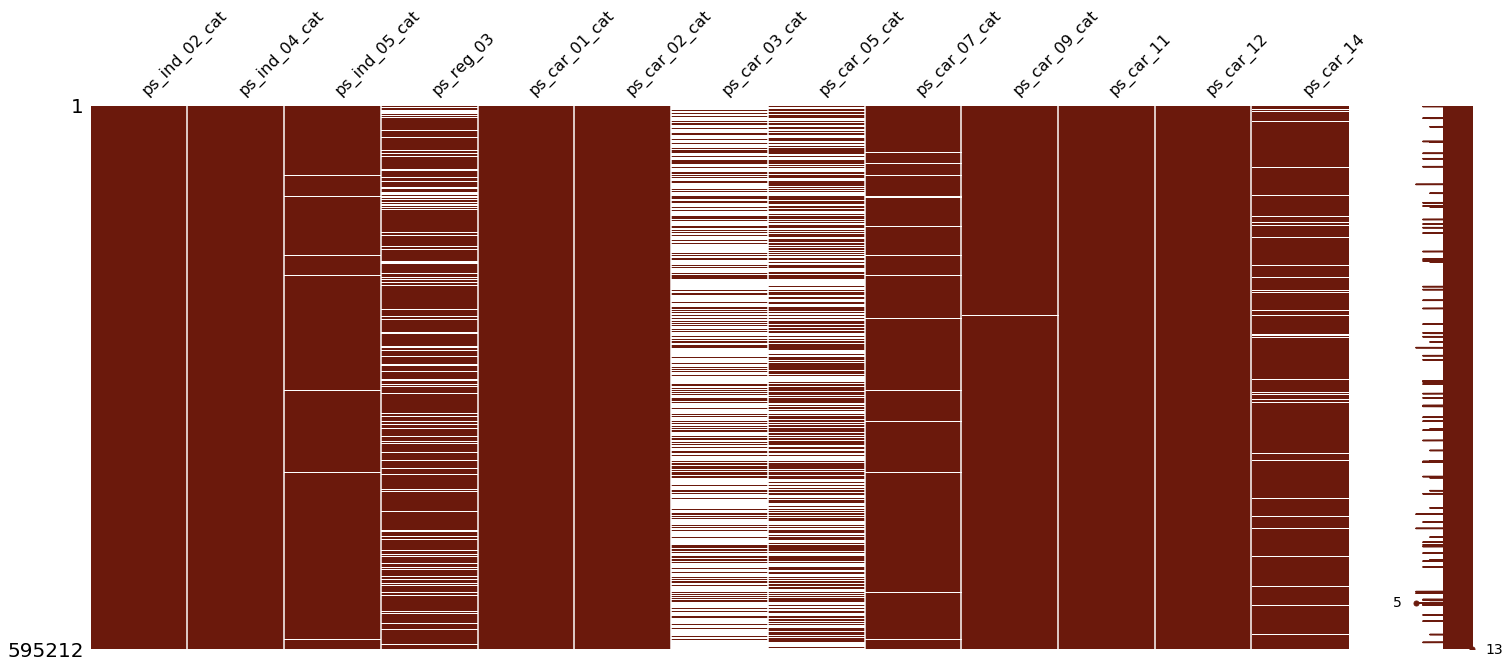

In [6]:
import missingno as msno

train_null_values = []
train_col_missing = []

for col in values:
    if len(train[col][train[col].isnull()].index):
        train_null_values.append((col, len(train[col][train[col].isnull()].index)))
        train_col_missing.append(col)
for i in sorted(train_null_values, key = lambda x: x[1], reverse = True):
    print(i)
msno.matrix(train[train_col_missing], color=(0.42, 0.1, 0.05))

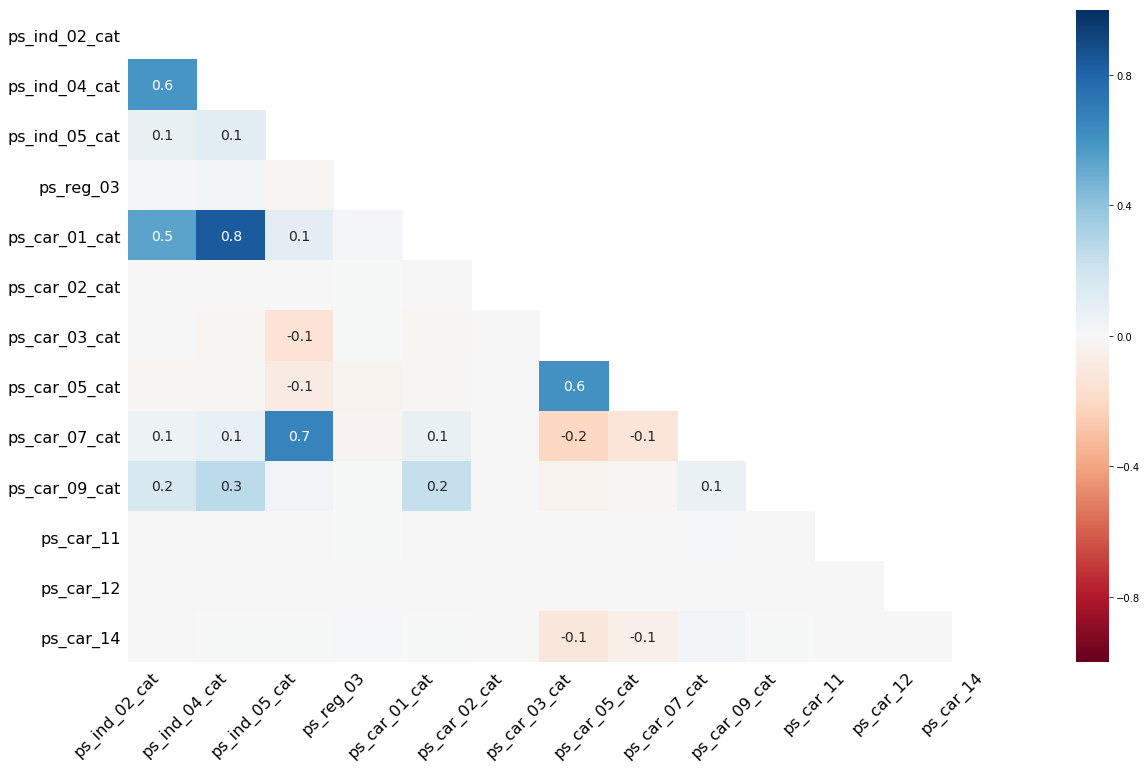

In [7]:
msno.heatmap(df = train[train_col_missing])

('ps_car_03_cat', 616911)
('ps_car_05_cat', 400359)
('ps_reg_03', 161684)
('ps_car_14', 63805)
('ps_car_07_cat', 17331)
('ps_ind_05_cat', 8710)
('ps_car_09_cat', 877)
('ps_ind_02_cat', 307)
('ps_car_01_cat', 160)
('ps_ind_04_cat', 145)
('ps_car_02_cat', 5)
('ps_car_11', 1)


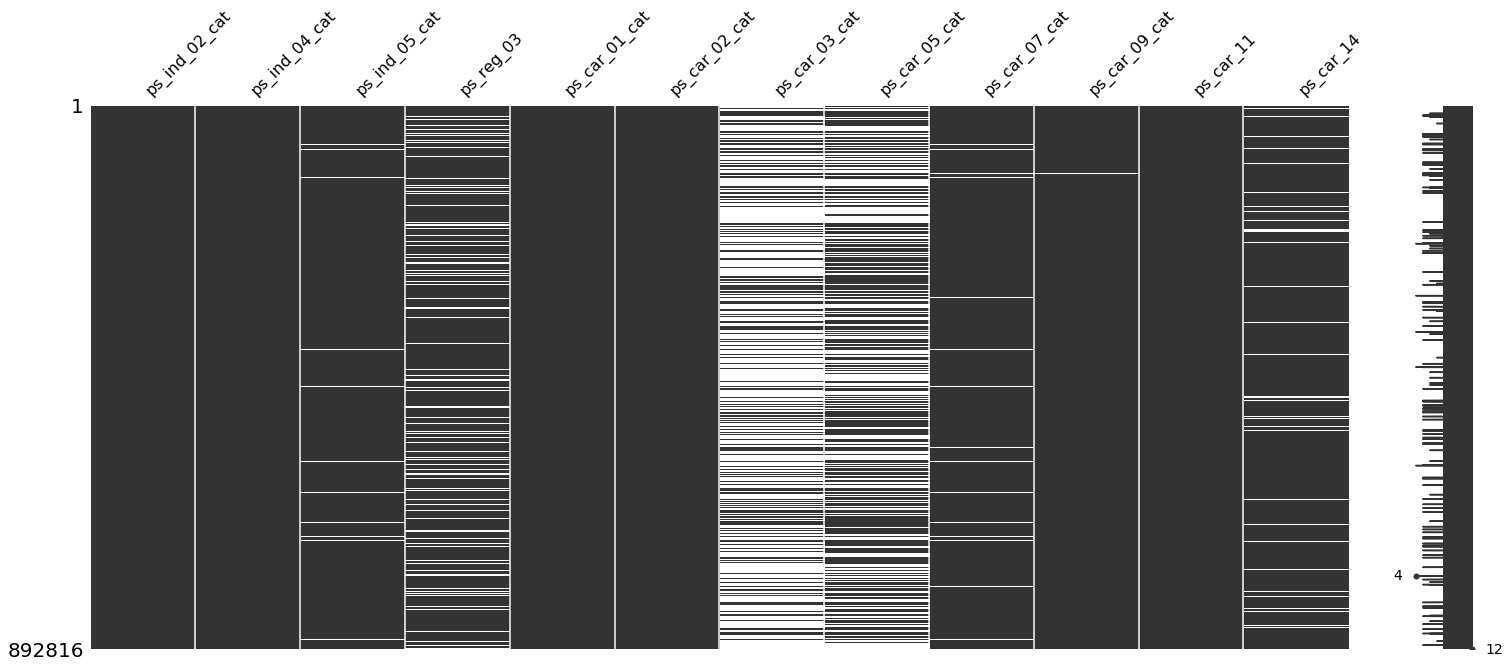

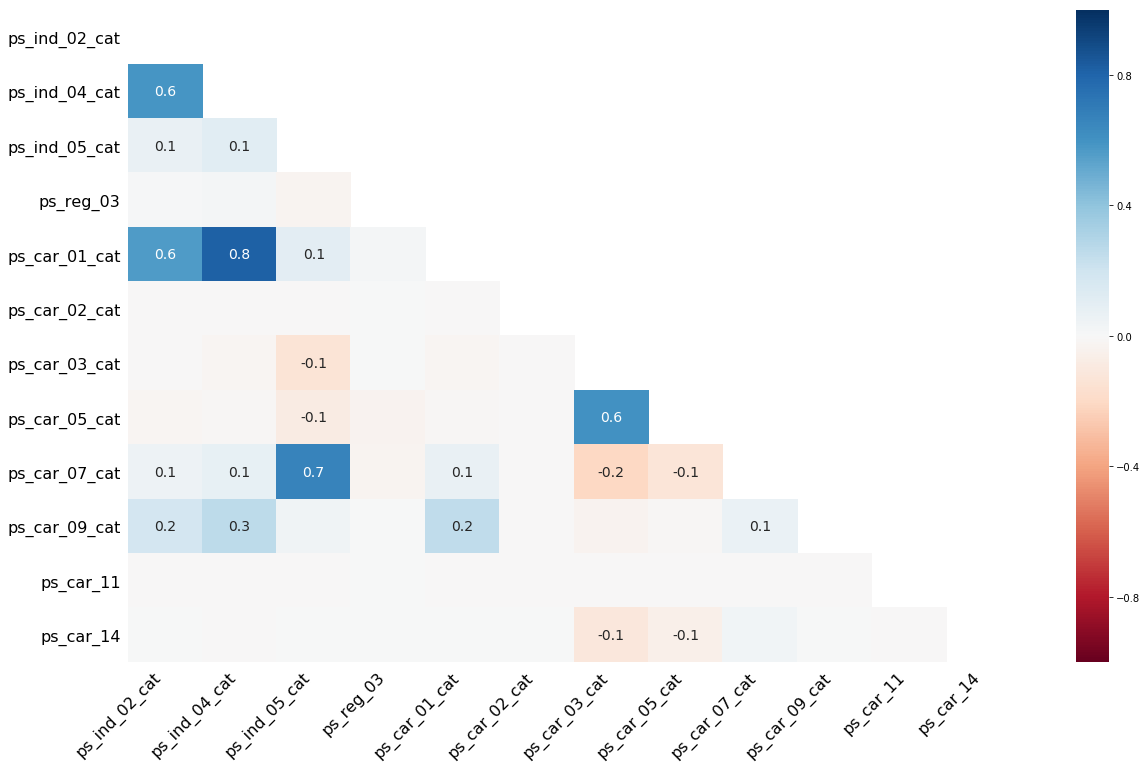

In [8]:
import missingno as msno

test_col_missing = []
test_null_values = []
for col in values:
    if len(test[col][test[col].isnull()].index):
        test_col_missing.append(col)
        test_null_values.append((col, len(test[col][test[col].isnull()].index)))
for i in sorted(test_null_values, key = lambda x: x[1], reverse = True):
    print(i)
    
msno.matrix(test[test_col_missing], color = (0.2, 0.2, 0.2))
msno.heatmap(test[test_col_missing])

## 相关性分析

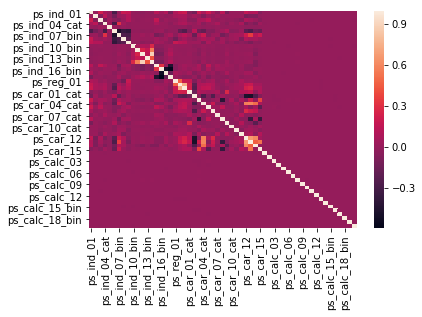

In [12]:
import seaborn as sns

sns.heatmap(train[values].corr())

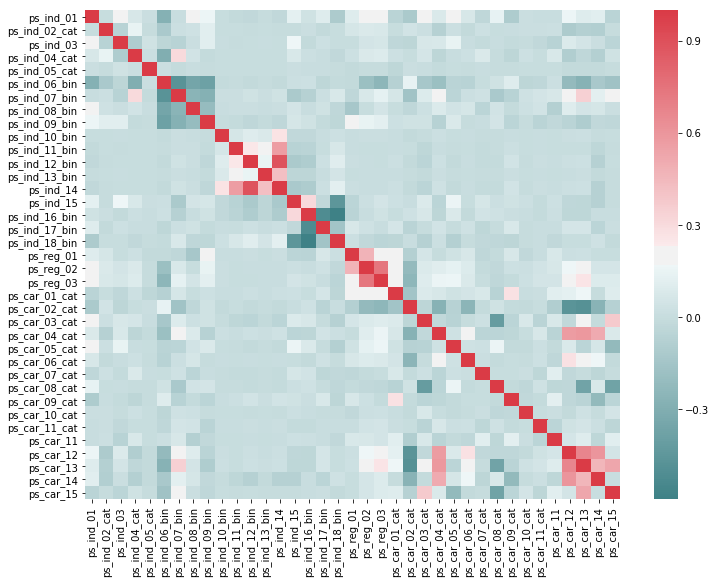

In [43]:
corr_values = values.copy()
for col in values:
    if 'calc' in col:
        corr_values.remove(col)
plt.figure(figsize = (12, 9))
sns.heatmap(train[corr_values].corr(), annot = False, cmap = sns.diverging_palette(200, 10, as_cmap=True))

## 各类特征分析
### 二分类特征分析

In [51]:
import plotly.offline as pltoff
import plotly.graph_objs as go

train_bin_zero_list = []
train_bin_one_list = []
for col in bin_cols:
    temp = train[col].value_counts()
    zero = temp[0]
    one = temp[1]
    train_bin_zero_list.append(zero)
    train_bin_one_list.append(one)

train_trace1 = go.Bar(x = bin_cols,
               y = train_bin_zero_list,
               name = 'zero_counts')
train_trace2 = go.Bar(x = bin_cols,
               y = train_bin_one_list,
               name = 'one_counts')
train_bin_plot_data = [train_trace1, train_trace2]
layout = go.Layout(barmode = 'stack')
fig = go.Figure(layout = layout, data = train_bin_plot_data)
pltoff.iplot(fig, filename = 'stacked-bar')
##ps_ind_14与ps_ind_10,ps_ind_11,ps_ind_12,ps_ind_13相关，而这3项空值较多

In [45]:
train['ps_ind_14'].value_counts()
##值为0的项较多，所以才相关性强，因此该相关性不能对分析起作用

0    588832
1      5495
2       744
3       136
4         5
Name: ps_ind_14, dtype: int64

In [53]:
import plotly.offline as pltoff
import plotly.graph_objs as go

test_bin_zero_list = []
test_bin_one_list = []

for col in bin_cols:
    temp = test[col].value_counts()
    test_bin_zero_list.append(temp[0])
    test_bin_one_list.append(temp[1])

test_trace1 = go.Bar(x = bin_cols,
                    y = test_bin_zero_list,
                    name = 'zero counts')
test_trace2 = go.Bar(x = bin_cols,
                    y = test_bin_one_list,
                    name = 'one counts')
test_bin_plot_data = [test_trace1, test_trace2]
layout = go.Layout(barmode = 'stack')
fig = go.Figure(data = test_bin_plot_data, layout = layout)
pltoff.iplot(fig, filename = 'stack-bar')